In [1]:
import pandas as pd

In [8]:
g4 = pd.read_csv("gxs004.csv")
g5 = pd.read_csv("gxs005.csv")
g6 = pd.read_csv("gxs006.csv")
g13 = pd.read_csv("gxs013.csv")
g15 = pd.read_csv("gxs015.csv")

In [9]:
g4_f = g4[g4['E value'] <= 1e-50]
g5_f = g5[g5['E value'] <= 1e-50]
g6_f = g6[g6['E value'] <= 1e-50]
g13_f = g13[g13['E value'] <= 1e-50]
g15_f = g15[g15['E value'] <= 1e-50]

In [11]:
column_list = ['Scientific Name','Per. ident', 'Acc. Len']
g4_f = g4_f[column_list]
g5_f = g5_f[column_list]
g6_f = g6_f[column_list]
g13_f = g13_f[column_list]
g15_f = g15_f[column_list]

In [12]:
g4_f['similarity'] = (g4_f['Per. ident'] / 100) * g4_f['Acc. Len']
g5_f['similarity'] = (g5_f['Per. ident'] / 100) * g5_f['Acc. Len']
g6_f['similarity'] = (g6_f['Per. ident'] / 100) * g6_f['Acc. Len']
g13_f['similarity'] = (g13_f['Per. ident'] / 100) * g13_f['Acc. Len']
g15_f['similarity'] = (g15_f['Per. ident'] / 100) * g15_f['Acc. Len']

In [13]:
g4_f['similarity_zscore'] = (g4_f['similarity'] - g4_f['similarity'].mean()) / g4_f['similarity'].std()
g5_f['similarity_zscore'] = (g5_f['similarity'] - g5_f['similarity'].mean()) / g5_f['similarity'].std()
g6_f['similarity_zscore'] = (g6_f['similarity'] - g6_f['similarity'].mean()) / g6_f['similarity'].std()
g13_f['similarity_zscore'] = (g13_f['similarity'] - g13_f['similarity'].mean()) / g13_f['similarity'].std()
g15_f['similarity_zscore'] = (g15_f['similarity'] - g15_f['similarity'].mean()) / g15_f['similarity'].std()

In [15]:
column_list = ['Scientific Name','similarity_zscore']
g4_f = g4_f[column_list]
g5_f = g5_f[column_list]
g6_f = g6_f[column_list]
g13_f = g13_f[column_list]
g15_f = g15_f[column_list]

In [16]:
g4_f = g4_f.rename(columns={'similarity_zscore': 'gxs004'})
g5_f = g5_f.rename(columns={'similarity_zscore': 'gxs005'})
g6_f = g6_f.rename(columns={'similarity_zscore': 'gxs006'})
g13_f = g13_f.rename(columns={'similarity_zscore': 'gxs013'})
g15_f = g15_f.rename(columns={'similarity_zscore': 'gxs015'})

In [20]:
g4_f = g4_f[~g4_f['Scientific Name'].duplicated(keep='first')]
g5_f = g5_f[~g5_f['Scientific Name'].duplicated(keep='first')]
g6_f = g6_f[~g6_f['Scientific Name'].duplicated(keep='first')]
g13_f = g13_f[~g13_f['Scientific Name'].duplicated(keep='first')]
g15_f = g15_f[~g15_f['Scientific Name'].duplicated(keep='first')]

In [21]:
merged_df = pd.merge(g4_f, g5_f, on='Scientific Name', how='outer')
merged_df = pd.merge(merged_df, g6_f, on='Scientific Name', how='outer')
merged_df = pd.merge(merged_df, g13_f, on='Scientific Name', how='outer')
merged_df = pd.merge(merged_df, g15_f, on='Scientific Name', how='outer')
merged_df = merged_df.fillna(0)
merged_df

Scientific Name    gxs004  gxs005  \
0                       Candidatus Tyloplasma litorale -1.312369     0.0   
1                      Candidatus Hepatoplasma vulgare -1.267604     0.0   
2                          Candidatus Stammera capleta -1.783774     0.0   
3    Enterobacteriaceae endosymbiont of Neohaemonia... -1.548125     0.0   
4    Enterobacteriaceae endosymbiont of Plateumaris... -1.517035     0.0   
..                                                 ...       ...     ...   
134                                  Treponema rectale  0.000000     0.0   
135                              Agathobacter rectalis  0.000000     0.0   
136                    Agathobacter rectalis DSM 17629  0.000000     0.0   
137                       Agathobacter rectalis M104/1  0.000000     0.0   
138                   Lancefieldella parvula DSM 20469  0.000000     0.0   

     gxs006  gxs013    gxs015  
0       0.0     0.0  0.000000  
1       0.0     0.0  0.000000  
2       0.0     0.0  0.000000  
3       0.0     0.0  0.000000  
4       0.0     0.0  0.000000  
..      ...     ...       ...  
134     0.0     0.0 -0.083530  
135     0.0     0.0  0.404653  
136     0.0     0.0  0.308419  
137     0.0     0.0  0.606472  
138     0.0     0.0 -1.376579  

[139 rows x 6 columns]

In [22]:
merged_t = merged_df.set_index('Scientific Name').transpose()
merged_t

Scientific Name  Candidatus Tyloplasma litorale  \
gxs004                                -1.312369   
gxs005                                 0.000000   
gxs006                                 0.000000   
gxs013                                 0.000000   
gxs015                                 0.000000   

Scientific Name  Candidatus Hepatoplasma vulgare  Candidatus Stammera capleta  \
gxs004                                 -1.267604                    -1.783774   
gxs005                                  0.000000                     0.000000   
gxs006                                  0.000000                     0.000000   
gxs013                                  0.000000                     0.000000   
gxs015                                  0.000000                     0.000000   

Scientific Name  Enterobacteriaceae endosymbiont of Neohaemonia nigricornis  \
gxs004                                                   -1.548125            
gxs005                                                    0.000000            
gxs006                                                    0.000000            
gxs013                                                    0.000000            
gxs015                                                    0.000000            

Scientific Name  Enterobacteriaceae endosymbiont of Plateumaris rustica  \
gxs004                                                   -1.517035        
gxs005                                                    0.000000        
gxs006                                                    0.000000        
gxs013                                                    0.000000        
gxs015                                                    0.000000        

Scientific Name  Candidatus Zinderia insecticola CARI  \
gxs004                                       -1.87538   
gxs005                                        0.00000   
gxs006                                        0.00000   
gxs013                                        0.00000   
gxs015                                        0.00000   

Scientific Name  Enterobacteriaceae endosymbiont of Macroplea appendiculata  \
gxs004                                                   -1.556904            
gxs005                                                    0.000000            
gxs006                                                    0.000000            
gxs013                                                    0.000000            
gxs015                                                    0.000000            

Scientific Name  Candidatus Shikimatogenerans bostrichidophilus  \
gxs004                                                -1.894775   
gxs005                                                 0.000000   
gxs006                                                 0.000000   
gxs013                                                 0.000000   
gxs015                                                 0.000000   

Scientific Name  Enterobacteriaceae endosymbiont of Macroplea mutica  \
gxs004                                                   -1.558405     
gxs005                                                    0.000000     
gxs006                                                    0.000000     
gxs013                                                    0.000000     
gxs015                                                    0.000000     

Scientific Name  Buchnera aphidicola (Ceratovacuna keduensis)  ...  \
gxs004                                              -1.629804  ...   
gxs005                                               0.000000  ...   
gxs006                                               0.000000  ...   
gxs013                                               0.000000  ...   
gxs015                                               0.000000  ...   

Scientific Name  Cellulosilyticum lentocellum DSM 5427  uncultured organism  \
gxs004                                        0.000000             0.000000   
gxs005                                        0

In [27]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

# euclidean distance
euclidean_dist = squareform(pdist(merged_t, metric='euclidean'))
print(euclidean_dist)
print(euclidean_dist.shape)

# cosine similarity 
cosine_matrix = squareform(pdist(merged_t, metric='cosine'))
print(cosine_matrix)
print(cosine_matrix.shape)

# 1 - pearson correlation distance
correlation_matrix = np.corrcoef(merged_t)
pearson_matrix = 1 - np.abs(correlation_matrix)
print(pearson_matrix)
print(pearson_matrix.shape)

[[ 0.         10.36663758 10.30520762  8.73827105  7.20629931]
 [10.36663758  0.         11.34937689  9.94828792  8.63375939]
 [10.30520762 11.34937689  0.          9.8842583   8.5599025 ]
 [ 8.73827105  9.94828792  9.8842583   0.          7.07902981]
 [ 7.20629931  8.63375939  8.5599025   7.07902981  0.        ]]
(5, 5)
[[0.         1.         1.         1.         1.        ]
 [1.         0.         1.         1.         1.        ]
 [1.         1.         0.         1.         1.        ]
 [1.         1.         1.         0.         1.18602798]
 [1.         1.         1.         1.18602798 0.        ]]
(5, 5)
[[0.00000000e+00 9.62876726e-01 9.83756974e-01 9.99935695e-01
  9.92064461e-01]
 [9.62876726e-01 0.00000000e+00 9.94543595e-01 9.99978398e-01
  9.97334271e-01]
 [9.83756974e-01 9.94543595e-01 1.11022302e-16 9.99990548e-01
  9.98833629e-01]
 [9.99935695e-01 9.99978398e-01 9.99990548e-01 0.00000000e+00
  8.13923643e-01]
 [9.92064461e-01 9.97334271e-01 9.98833629e-01 8.13923643e-

In [39]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

clusters = range(2,5)

# euclidean matrix
score_euclidean_km = []
score_euclidean_hrchy = []

for n_cluster in clusters:
    km = KMeans(n_clusters = n_cluster, random_state = 1) # use random state = 1
    labels = km.fit_predict(euclidean_dist)
    score = silhouette_score(euclidean_dist, labels, metric = 'precomputed')
    score_euclidean_km.append(score)
    
    # use agglomerative for hierarchical and average distance to compute the nearest neighbor clusters
    hrchy = AgglomerativeClustering(n_clusters = n_cluster, metric = 'precomputed', linkage = 'average')
    labels = hrchy.fit_predict(euclidean_dist)
    score = silhouette_score(euclidean_dist, labels, metric = 'precomputed')
    score_euclidean_hrchy.append(score)

print(score_euclidean_km)
print(score_euclidean_hrchy)

[0.10745973333796713, 0.009342879862731735, 0.04150859316770748]
[0.1136790563096799, 0.11836481940523194, 0.04150859316770748]


In [40]:
# pearson matrix
score_pearson_km = []
score_pearson_hrchy = []

for n_cluster in clusters:
    km = KMeans(n_clusters = n_cluster, random_state = 1) # use random state = 1
    labels = km.fit_predict(pearson_matrix)
    score = silhouette_score(pearson_matrix, labels, metric = 'precomputed')
    score_pearson_km.append(score)
    
    # use agglomerative for hierarchical and average distance to compute the nearest neighbor clusters
    hrchy = AgglomerativeClustering(n_clusters = n_cluster, metric = 'precomputed', linkage = 'average')
    labels = hrchy.fit_predict(pearson_matrix)
    score = silhouette_score(pearson_matrix, labels, metric = 'precomputed')
    score_pearson_hrchy.append(score)

print(score_pearson_km)
print(score_pearson_hrchy)

[0.08438735839757082, 0.08416921227863788, 0.07311795678013912]
[0.08438735839757082, 0.08416921227863788, 0.07311795678013912]


In [41]:
# cosine matrix
score_cosine_km = []
score_cosine_hrchy = []

for n_cluster in clusters:
    km = KMeans(n_clusters = n_cluster, random_state = 1) # use random state = 1
    labels = km.fit_predict(cosine_matrix)
    score = silhouette_score(cosine_matrix, labels, metric = 'precomputed')
    score_cosine_km.append(score)
    
    # use agglomerative for hierarchical and average distance to compute the nearest neighbor clusters
    hrchy = AgglomerativeClustering(n_clusters = n_cluster, metric = 'precomputed', linkage = 'average')
    labels = hrchy.fit_predict(cosine_matrix)
    score = silhouette_score(cosine_matrix, labels, metric = 'precomputed')
    score_cosine_hrchy.append(score)

print(score_cosine_km)
print(score_cosine_hrchy)

[0.03136991372450281, 0.0, 0.0]
[0.03136991372450281, 0.0, 0.0]


In [42]:
score_table = {
    'k-means (pearson)': score_pearson_km,
    'hierarchical (pearson)': score_pearson_hrchy,
    'k-means (euclidean)': score_euclidean_km,
    'hierarchical (euclidean)': score_euclidean_hrchy,
    'k-means (cosine)': score_cosine_km,
    'hierarchical (cosine)': score_cosine_hrchy
}
score_table = pd.DataFrame(score_table, index = range(2, 5))
score_table

k-means (pearson)  hierarchical (pearson)  k-means (euclidean)  \
2           0.084387                0.084387             0.107460   
3           0.084169                0.084169             0.009343   
4           0.073118                0.073118             0.041509   

   hierarchical (euclidean)  k-means (cosine)  hierarchical (cosine)  
2                  0.113679           0.03137                0.03137  
3                  0.118365           0.00000                0.00000  
4                  0.041509           0.00000                0.00000

In [43]:
max_score = score_table.max().max()
combination = score_table.max().idxmax()
cluster_number = score_table[combination].idxmax()

print(f"max score: {max_score}")
print(f"clustering method and metric: {combination}")
print(f"cluster number: {cluster_number}")

max score: 0.11836481940523194
clustering method and metric: hierarchical (euclidean)
cluster number: 3


In [45]:
hrchy = AgglomerativeClustering(n_clusters = 3, metric = 'precomputed', linkage = 'average')
labels = hrchy.fit_predict(euclidean_dist)
score = silhouette_score(euclidean_dist, labels, metric = 'precomputed')
print(score)
print(labels)

0.11836481940523194
[0 1 2 0 0]


In [46]:
g_label = pd.DataFrame({'genome': list(merged_t.index), 'label': list(labels)})
g_label

genome  label
0  gxs004      0
1  gxs005      1
2  gxs006      2
3  gxs013      0
4  gxs015      0

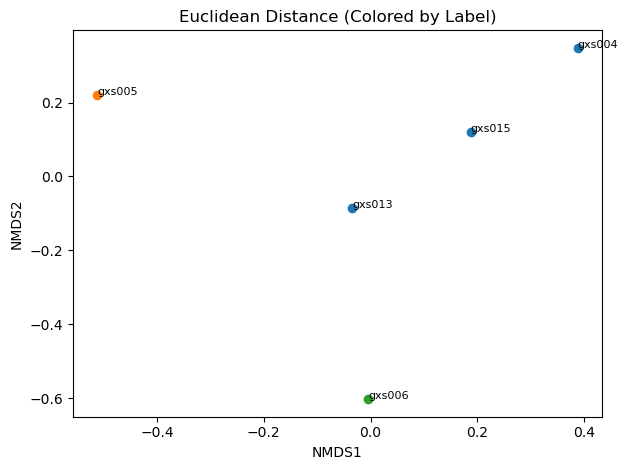

In [50]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

mds = MDS(n_components = 2, metric = False, random_state = 1, dissimilarity = 'euclidean')
projections_mds = mds.fit_transform(merged_t)

unique_labels = g_label['label'].unique()
colors = plt.cm.tab10(range(len(unique_labels)))  # Choose a colormap

label_color_dict = dict(zip(unique_labels, colors))

for i, label in enumerate(g_label['label']):
    plt.scatter(projections_mds[i, 0], projections_mds[i, 1], 
                color=label_color_dict[label], label=label if label not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(projections_mds[i, 0], projections_mds[i, 1], g_label['genome'][i], fontsize=8)

plt.xlabel('NMDS1')
plt.ylabel('NMDS2')
plt.title('Euclidean Distance (Colored by Label)')
plt.tight_layout()
plt.show()

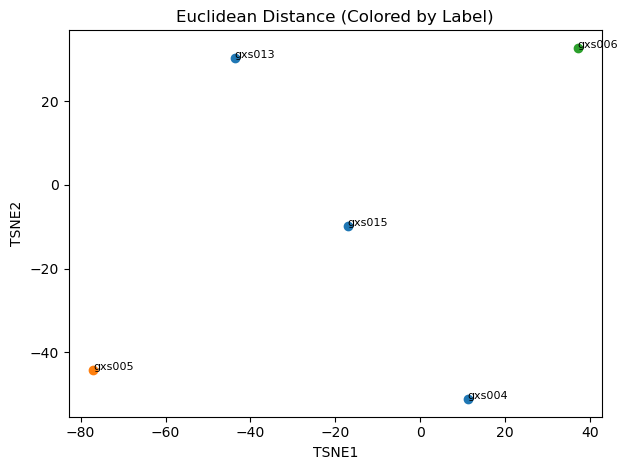

In [51]:
tsne = TSNE(n_components = 2, perplexity = 3, method = 'exact', random_state = 1)
projections_tsne = tsne.fit_transform(merged_t)

for i, label in enumerate(g_label['label']):
    plt.scatter(projections_tsne[i, 0], projections_tsne[i, 1], 
                color=label_color_dict[label], label=label if label not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(projections_tsne[i, 0], projections_tsne[i, 1], g_label['genome'][i], fontsize=8)
    
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('Euclidean Distance (Colored by Label)')
plt.tight_layout()
plt.show()